In [1]:
import matplotlib.pyplot as plt
import numpy as np

I've got some experimental results that show that PFC responds differently to inputs coming from optogenetic stimulation of parietal cortex depending on behavior state. When the subject is engaged in a delayed movement task, I get an increased PFC response to parietal stimulation compared to rest conditions.

My goal is to build an RNN that exhibits state-dependent responses.

I computed the averaged evoked resposes from the data and entered them by hand below. (I flipped polarity so that all responses show upward deflections--opposite to the standard convention for extra-cellular recordings.)

In [2]:
# Set outputs to model
f = np.array([[-0.91, -0.83, -0.75, -0.74, -0.67, -0.51, -0.40, -0.38, \
              -0.45, -0.56, -0.60, -0.54, -0.51, -0.57, -0.59, -0.54, \
              -0.48, -0.46, -0.45, -0.39, -0.29, -0.18, -0.10, 0.03, 0.15, \
              0.15, 0.12, 0.08, 0.05, 0.08, 0.11, 0.05, -0.07, -0.17, -0.19, \
              -0.14, -0.10, -0.07, 0.04, 0.10, 0.08, 0.08, 0.06, -0.01, \
              -0.04, -0.01, -0.08, -0.25, -0.30, -0.21, -0.21, -0.21, \
              -0.07, 0.11, 0.23, 0.27, 0.27, 0.34, 0.41, 0.44, 0.43, 0.34, \
              0.23, 0.18, 0.21, 0.33, 0.43, 0.39, 0.29, 0.20, 0.17, 0.20, \
              0.19, 0.11, 0.07, 0.07, 0.07, 0.06, -0.06, -0.19, -0.18, -0.11, \
              -0.03, 0.07, 0.22, 0.31, 0.32, 0.33, 0.31, 0.20, 0.11, 0.09, 0.01, \
              -0.07, -0.02, 0.08, 0.12, 0.04, -0.06, 0.00, 0.13, 0.25, 0.41, \
              0.54, 0.59, 0.46, 0.09, -0.58, -1.47, -2.36, -3.32, -4.35, -5.18, \
              -5.56, -5.59, -5.42, -5.10, -4.60, -3.87, -3.18, -2.61, -2.08, \
              -1.61, -1.19, -0.76, -0.35, 0.04, 0.39, 0.66, 0.87, 1.01, 1.10, \
              1.19, 1.32, 1.50, 1.58, 1.54, 1.50, 1.48, 1.44, 1.34, 1.20, 1.17, \
              1.24, 1.24, 1.14, 0.94, 0.66, 0.48, 0.38, 0.20, -0.08, -0.37, -0.69, \
              -0.95, -1.17, -1.38, -1.51, -1.55, -1.58, -1.54, -1.38, -1.22, -1.13, \
              -1.13, -1.13, -1.04, -0.93, -0.90, -0.90, -0.91, -0.94, -0.94, \
              -0.91, -0.91, -1.00, -1.11, -1.24, -1.39, -1.48, -1.53, -1.55, -1.48, \
              -1.39, -1.36, -1.37, -1.42, -1.50, -1.62, -1.76, -1.89, -2.00, -2.02, \
              -1.94, -1.81, -1.69, -1.62, -1.64, -1.70, -1.76, -1.75, -1.67, -1.60, \
              -1.62, -1.62, -1.56, -1.52, -1.52, -1.54, -1.52, -1.51, -1.56, -1.57, \
              -1.61, -1.68, -1.70, -1.67, -1.60, -1.56, -1.51, -1.41, -1.36, -1.36, \
              -1.34, -1.31, -1.25, -1.16, -1.04, -0.90, -0.78, -0.73, -0.68, -0.60, \
              -0.50, -0.42, -0.38, -0.33, -0.32, -0.40, -0.37, -0.29, -0.33, -0.41, \
              -0.45, -0.46, -0.37, -0.20, -0.13, -0.09, -0.02, 0.05, 0.15, 0.24, \
              0.26, 0.29, 0.28, 0.26, 0.33, 0.29, 0.12, 0.06, 0.16, 0.27, 0.29, 0.24, \
              0.23, 0.26, 0.24, 0.20, 0.22, 0.33, 0.46, 0.52, 0.56, 0.65, 0.77, 0.85, \
              0.86, 0.86, 0.88, 0.87, 0.88, 0.84, 0.73, 0.59, 0.46, 0.41, 0.51, 0.65, \
              0.66, 0.60, 0.47, 0.34, 0.25, 0.19, 0.12, 0.02, -0.01, 0.04, 0.06]])
fx = np.arange(0,3000,10)
f = np.interp(np.arange(0,3000), fx, f[0])
f2 = np.array([[-0.79, -0.84, -0.96, -0.94, -0.89, -0.94, -0.91, -0.78, -0.80, -0.88, \
               -0.86, -0.87, -0.87, -0.90, -0.98, -0.96, -0.78, -0.60, -0.58, -0.68, \
               -0.80, -0.91, -1.01, -1.13, -1.09, -0.90, -0.83, -0.86, -0.85, -0.82, \
               -0.73, -0.73, -0.83, -0.94, -1.15, -1.35, -1.32, -1.19, -1.05, -0.87, \
               -0.79, -0.82, -0.94, -1.10, -1.17, -1.12, -1.07, -1.01, -0.80, -0.57, \
               -0.50, -0.53, -0.49, -0.27, -0.12, -0.15, -0.17, -0.13, -0.04, 0.03, \
               -0.01, -0.17, -0.30, -0.29, -0.33, -0.39, -0.36, -0.31, -0.39, -0.53, \
               -0.58, -0.59, -0.45, -0.25, -0.25, -0.37, -0.50, -0.54, -0.60, -0.71, \
               -0.90, -1.08, -1.12, -1.03, -0.83, -0.65, -0.62, -0.69, -0.70, -0.67, \
               -0.52, -0.26, -0.12, -0.10, -0.01, 0.08, 0.04, -0.08, -0.14, 0.00, 0.33, \
               0.63, 0.76, 0.72, 0.54, 0.11, -0.70, -1.74, -2.91, -4.18, -5.31, -6.02, \
               -6.35, -6.36, -6.01, -5.28, -4.28, -3.18, -1.97, -0.76, 0.22, 1.11, 2.09, \
               3.15, 4.11, 4.85, 5.40, 5.76, 6.04, 6.23, 6.23, 5.97, 5.47, 4.93, 4.62, \
               4.38, 3.94, 3.38, 2.80, 2.31, 1.86, 1.17, 0.22, -0.73, -1.58, -2.37, \
               -3.22, -4.09, -4.80, -5.31, -5.73, -6.06, -6.14, -5.99, -5.82, -5.54, \
               -5.09, -4.60, -4.15, -3.75, -3.46, -3.19, -2.65, -1.99, -1.59, -1.48, \
               -1.39, -1.13, -0.75, -0.52, -0.40, -0.31, -0.32, -0.35, -0.38, -0.44, \
               -0.52, -0.54, -0.52, -0.59, -0.67, -0.70, -0.63, -0.35, -0.03, 0.20, 0.43, \
               0.56, 0.51, 0.58, 0.95, 1.20, 1.17, 1.03, 0.92, 0.78, 0.64, 0.58, 0.63, \
               0.74, 0.81, 0.76, 0.62, 0.55, 0.50, 0.37, 0.13, -0.05, -0.10, -0.12, -0.22, \
               -0.41, -0.77, -1.10, -1.14, -1.23, -1.48, -1.51, -1.32, -1.26, -1.33, -1.29, \
               -1.18, -1.14, -1.09, -1.08, -1.16, -1.18, -1.13, -1.10, -1.19, -1.35, -1.46, \
               -1.55, -1.54, -1.53, -1.49, -1.41, -1.45, -1.48, -1.41, -1.32, -1.28, -1.20, \
               -1.13, -1.17, -1.20, -1.04, -0.83, -0.82, -0.96, -1.06, -1.05, -0.96, -0.83, \
               -0.69, -0.64, -0.69, -0.72, -0.88, -1.04, -0.92, -0.75, -0.73, -0.77, -0.82, \
               -0.98, -1.13, -1.07, -0.95, -0.86, -0.71, -0.51, -0.43, -0.57, -0.75, -0.77, \
               -0.82, -0.87, -0.70, -0.60, -0.63, -0.68, -0.68, -0.63, -0.72, -0.85, -0.79, \
               -0.64, -0.61, -0.71, -0.65, -0.26, 0.11, 0.29, 0.43, 0.51, 0.51, 0.53, 0.66]])
fx = np.arange(0,3000,10)
f2 = np.interp(np.arange(0,3000), fx, f2[0])

FT = np.zeros([2,np.size(f)])
FT[0] = f/np.min(f)
FT[1] = f2/np.min(f2)

I'm going to use FORCE learning (Sussillo 2009) to train my RNN. Here, I'm setting up some parameters.

In [3]:
# set other parameters
n_loops=10 #number of iterations for model fitting
N = 400 #number of neurons
p = 0.1 #connection probability
g = 1.5 #scalar strength of connections (>=1.5 gives chaotic behavior)
alpha = 1.0# learning rate
nsecs = 3000 #number of milliseconds to simulate
dt = 1.0 #time step in milliseconds 
tau = 200.0 #synaptic time constant in milliseconds
learn_every = 2 #train new weights every (learn_every) time step
scale = 1.0/np.sqrt(p*N) # scales connectivity matrix

Next, we set up some initial conditions for the RNN.

In [4]:
#define the initial random chaotic connectivity matrix for PFC
M_mask = np.random.rand(N,N)
M_mask[M_mask > p] = 1
M_mask[M_mask <= p] = 0
M_mask = 1 - M_mask
M = np.random.randn(N,N)
M = np.multiply(M,M_mask)*g*scale

#time
simtime = np.arange(0,nsecs - dt,dt)

#external input time series
inputStim = 0*simtime #optogenetic stimulation
inputStim[1000:1100] = 2 #optogenetic stimulation for 100ms
inputBehavior = 0*simtime + 1 #modulator is on during behavior condition
inputRest = 0*simtime #modulation is off during rest condition

w_in = np.random.randn(N,2); #spatial vector of external inputs. column 0 is opto-stim input weights, column 1 is modulator input weights
wo = np.zeros([N,1]); #initialize readout vectors (one for each module)
dw = np.zeros([N,1]); #initialze change in readout vector

x0 = 0.5*np.random.randn(N,1)*0 #initial activity

M0 = M #initial recurrent connectivity
noise = 0 #I'll set this to zero for now, but can play with it later

#readin vectors 
u = np.ones([N,1])

The next step is to train the model following Sussillo 2009. Importantly, the model will have input from the stimulation response AND state-dependent input, which is meant to mimic input from a modulatory brain area.

The activity of the *i*th neuron is governed by the equation

$\tau\frac{dr_{i}(t)}{dt}=-r_{i}(t)+\sum_{j=1}^{N}W_{i,j}f(r_{j}(t))+S_{i}(t)+B_{i}(t)+\eta_{i}(t)$

where r(t) is the firing rate of the *i*th neuron, $S_{i}(t)$ is the optogenetic stimulation input to the *i*th neuron and $B_{i}(t)$ is the behavioral-state-dependent modulatory input to the *i*th neuron.

I use FORCE learning (Sussillo 2009) to train this RNN by minimizing the difference between the empirical output, *f*, and the readout of the RNN, $z(t)=\sum_{}{}w_{o,j}r_{j}(t)$. 

In [5]:
Z = np.zeros([np.size(simtime),n_loops,2]) #initialize readout

for trn in range(1,n_loops):#training iteration loop
    for iBehave in range(0,2):#training each condition (rest/behavior)
        ft = FT[iBehave]
        x = x0*1.0
        r = np.tanh(x)
        z = np.dot(wo.T,r)

        ti = -1
        P = (1.0/alpha)*np.eye(N)
        clamp = np.zeros([N,1])
        
        #Setting state dependent input.
        if iBehave:
            modInput = inputBehavior
        else:
            modInput = inputRest

        for j in range(int(1),int(nsecs-1)):#solve dynamics using Euler's method
            ti = ti + 1
            
            x = (1.0-dt/tau)*x + np.dot(M,r*dt/tau) + dt/tau*inputStim[ti]*np.expand_dims(w_in[:,0],1) + \
            dt/tau*modInput[ti]*np.expand_dims(w_in[:,1],1) + np.random.randn(N,1)*noise

            r = np.tanh(x)
            z = np.dot(wo.T,r)
            z0 = np.dot(wo.T,r)

            if trn>0 and trn<n_loops-1:#training section 
                if np.mod(ti,learn_every) == 0:
                    rr = r*0
                    #calculating the change in readout weights according to eqs 4 and 5 in Sussillo 2009.
                    rr = r
                    k = np.dot(P,rr)
                    rPr = np.dot(rr.T,k)
                    c = np.true_divide(1.0,(1.0 + rPr))
                    P = P - np.dot(k,np.dot(c,k.T))
                    e = z - ft[ti]
                    dw = -e*k*c
                    wo = wo + dw
                    #here the outer product of the change of readout weights is taken with the readin weight vector to determine the
                    #change in recurrent connections.
                    M = M + np.outer(u,dw[:,0].T)
            Z[ti,trn,iBehave] = z

print('Model fitting complete')

Model fitting complete


Let's plot the empirical and model responses for the two conditions.

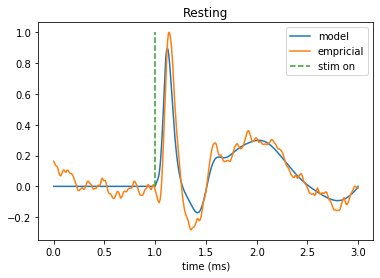

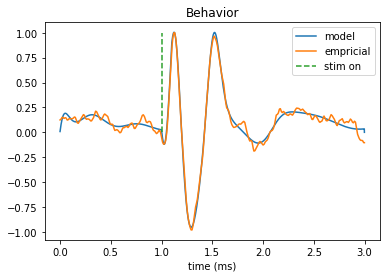

In [6]:
i=0
plt.plot(simtime/1000,Z[:,n_loops-1,i])
plt.plot(simtime/1000,FT[i,0:2999])
plt.plot([1, 1], [0,1], '--')
plt.legend(['model', 'empricial', 'stim on'])
plt.xlabel('time (ms)')
plt.title('Resting')
plt.show()

i=1
plt.plot(simtime/1000,Z[:,n_loops-1,i])
plt.plot(simtime/1000,FT[i,0:2999]/np.max(FT[i,0:2999]))
plt.plot([1, 1], [0,1], '--')
plt.legend(['model', 'empricial', 'stim on'])
plt.xlabel('time (ms)')
plt.title('Behavior')
plt.show()

The model is able to simulate the empically observed behavioral-state-dependent PFC responses to parietal stimulation.